In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

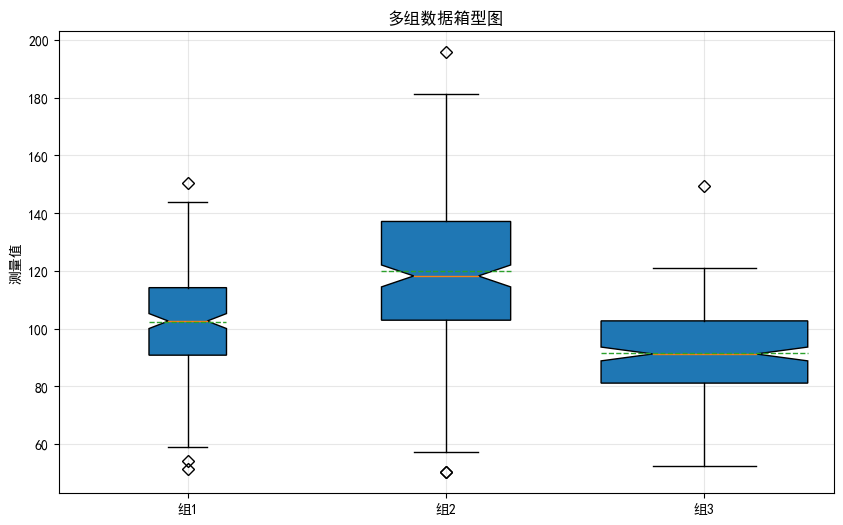

In [3]:
# 生成多组数据
np.random.seed(1)
group1 = np.random.normal(100, 20, 200)
group2 = np.random.normal(120, 25, 200)
group3 = np.random.normal(90, 15, 200)
# 将三组数据整理为列表，作为箱型图的输入数据
data = [group1, group2, group3]
# 定义每组数据对应的标签，用于图表的x轴刻度显示
labels = ['组1', '组2', '组3']

plt.figure(figsize=(10, 6))
bp = plt.boxplot(
                data,                 # 输入的多组数据
                labels=labels,        # 设置x轴刻度标签为自定义标签
                meanline=True,        # 用线而不是点表示均值
                notch=True,           # 创建带缺口的箱型图（缺口表示中位数的置信区间）
                patch_artist=True,    # 允许对箱体进行填充（否则箱体为空心）
                sym='D',              # 异常值标记为菱形（D表示diamond）
                widths=[0.3,0.5,0.8], # 分别设置三个箱体的宽度（组1:0.3, 组2:0.5, 组3:0.8）
                showmeans=True        # 显示均值
                )

plt.title('多组数据箱型图')
plt.ylabel('测量值')
plt.grid(True, alpha=0.3)
plt.show()

### 函数返回值解析：

In [4]:
# 生成示例数据
data = np.random.normal(100, 20, 100)

# 绘制箱型图并获取返回值
bp = plt.boxplot(data)
plt.close()  # 关闭图形，避免显示

print("返回值类型:", type(bp))
print("返回值:", bp)

返回值类型: <class 'dict'>
返回值: {'whiskers': [<matplotlib.lines.Line2D object at 0x00000225942E0E20>, <matplotlib.lines.Line2D object at 0x00000225942EF100>], 'caps': [<matplotlib.lines.Line2D object at 0x00000225942EF3A0>, <matplotlib.lines.Line2D object at 0x00000225942EF640>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000225942E0B80>], 'medians': [<matplotlib.lines.Line2D object at 0x00000225942EF8E0>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000225942EFB80>], 'means': []}


### 使用返回值自定义样式

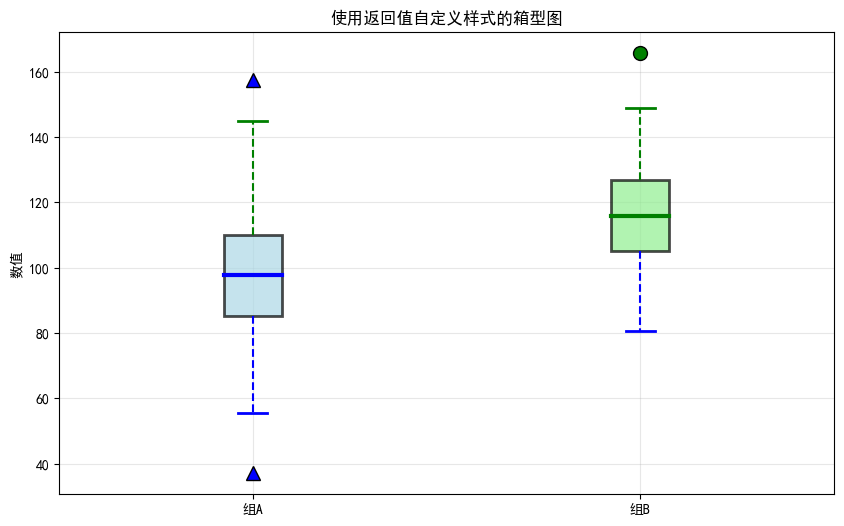

In [5]:
# 创建多组数据
np.random.seed(12)
data = [np.random.normal(100, 20, 100),
        np.random.normal(120, 15, 100)]

plt.figure(figsize=(10, 6))
bp = plt.boxplot(data, patch_artist=True)

# 使用返回值自定义样式
# 1. 设置箱子颜色
colors = ['lightblue', 'lightgreen']
for i, box in enumerate(bp['boxes']):
    box.set(facecolor=colors[i], alpha=0.7, linewidth=2)

# 2. 设置中位数线样式
colors = ['blue', 'green']
for i, median in enumerate(bp['medians']):
    median.set(color=colors[i], linewidth=3, linestyle='-')

# 3. 设置须线样式
colors = ['blue', 'green','blue', 'green']
for i,whisker in enumerate(bp['whiskers']):
    whisker.set(color=colors[i], linewidth=1.5, linestyle='--')

# 4. 设置端点帽样式
colors = ['blue', 'green','blue', 'green']
for i,cap in enumerate(bp['caps']):
    cap.set(color=colors[i], linewidth=2)

# 5. 设置异常值样式
colors = ['blue', 'green']
markers = ['^', 'o']
for i,flier in enumerate(bp['fliers']):
    flier.set(marker=markers[i], markerfacecolor=colors[i], markersize=10)

plt.title('使用返回值自定义样式的箱型图')
plt.ylabel('数值')
plt.xticks([1, 2], ['组A', '组B'])
plt.grid(True, alpha=0.3)
plt.show()

## 2、使用示例：

### 示例1：自定义样式与颜色

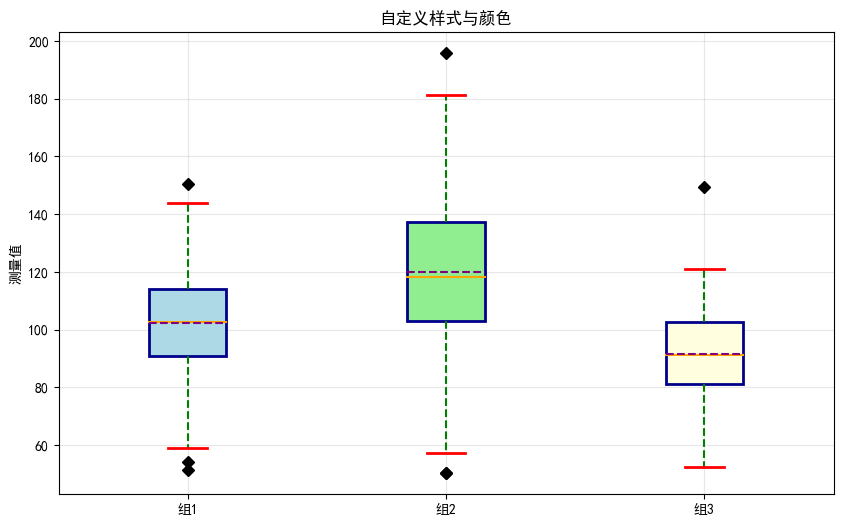

In [6]:
# 生成多组数据
np.random.seed(1)
group1 = np.random.normal(100, 20, 200)
group2 = np.random.normal(120, 25, 200)
group3 = np.random.normal(90, 15, 200)

data = [group1, group2, group3]
labels = ['组1', '组2', '组3']

# 自定义箱型图各部分的样式
box_style = {
            # 箱体样式：实线、线宽2、深蓝色边框
            'boxprops': dict(linestyle='-', linewidth=2, color='darkblue'),
            # 须线样式：虚线、线宽1.5、绿色
            'whiskerprops': dict(linestyle='--', linewidth=1.5, color='green'),
            # 须线端点帽子样式：线宽2、红色
            'capprops': dict(linewidth=2, color='red'),
            # 中位线样式：实线、线宽1.5、橙色
            'medianprops': dict(linestyle='-', linewidth=1.5, color='orange'),
            # 异常值样式：菱形标记、橙色边框、黑色填充、大小6
            'flierprops': dict(marker='D', color='orange', markerfacecolor='k', markersize=6),
            # 均值线样式：虚线、线宽1.5、紫色（需配合showmeans=True使用）
            'meanprops':dict(linestyle='--', linewidth=1.5, color='purple')
            # 'meanprops':dict(marker='^', color='purple')
}

plt.figure(figsize=(10, 6))
bp = plt.boxplot(
                data,                 # 输入的多组数据
                labels=labels,        # 设置x轴刻度标签
                patch_artist=True,    # 开启箱体填充功能（必须设置才能自定义填充色）
                showmeans=True,       # 显示均值（配合meanprops和meanline使用）
                meanline=True,        # 将均值显示为线而非点（与meanprops的线条样式对应）
                **box_style           # 通过解包操作应用自定义样式字典
)

# 为每个箱体设置不同的填充颜色
colors = ['lightblue', 'lightgreen', 'lightyellow']
# 遍历箱体对象和颜色列表，逐一设置填充色
# bp['boxes']是一个包含所有箱体的列表，与colors按顺序对应
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    

plt.title('自定义样式与颜色')
plt.ylabel('测量值')
plt.grid(True, alpha=0.3)
plt.show()

### 示例2：分组箱型图

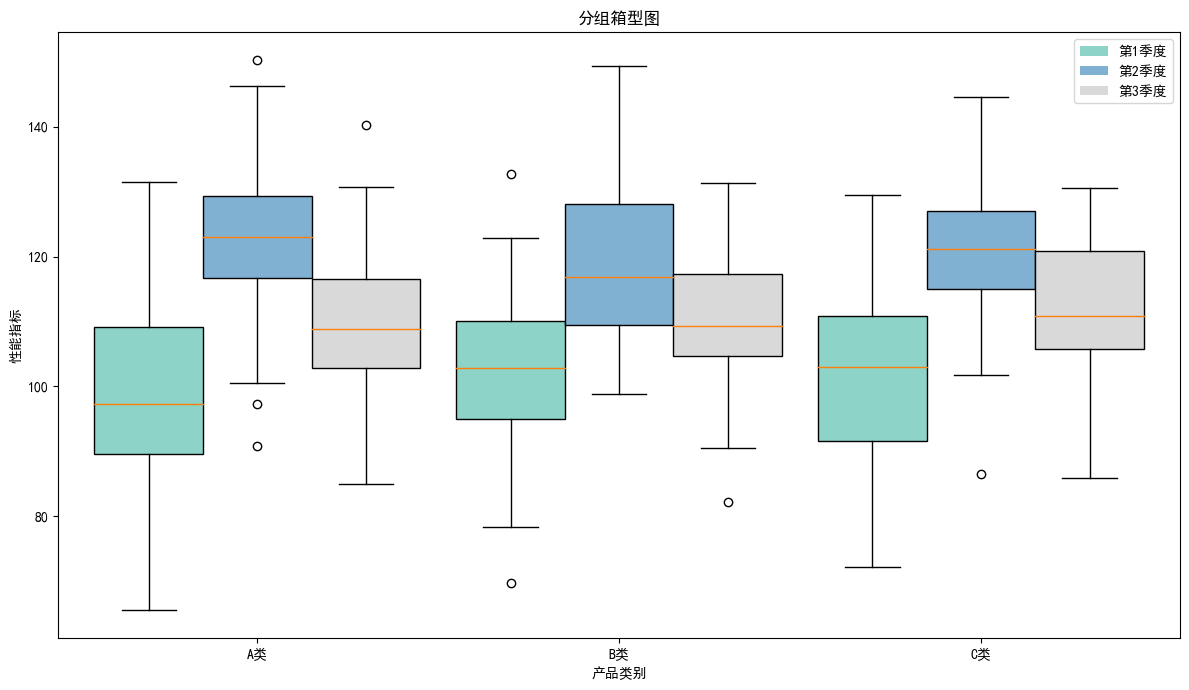

In [7]:
# 创建分组数据
np.random.seed(1)
categories = ['A类', 'B类', 'C类']
quarter1 = [np.random.normal(100, 15, 50) for _ in range(3)]
quarter2 = [np.random.normal(120, 12, 50) for _ in range(3)]
quarter3 = [np.random.normal(110, 10, 50) for _ in range(3)]

data = [quarter1, quarter2, quarter3]

plt.figure(figsize=(12, 7))

# 设置箱体位置和宽度（实现同类别内多季度数据并排显示）
# 计算每个产品类别的基准位置（间隔为2，避免箱体重叠）
positions = np.arange(len(categories)) * 2
# 单个箱体的宽度（设置为0.6，确保同类别内三个季度的箱体紧凑排列）
width = 0.6

# 循环绘制每个季度的箱型图
for i, quarter in enumerate(data):
    bp = plt.boxplot(
        quarter, 
        # 计算箱体位置：基准位置 + 季度偏移（i*width确保同类别内横向排列）
        positions=positions + i*width, 
        widths=width, 
        patch_artist=True
    )
    
    # 为当前季度的所有箱体设置统一颜色
    for box in bp['boxes']:
        box.set_facecolor(plt.cm.Set3(i/3))

# 设置x轴标签
plt.xticks(positions + width, categories)
plt.xlabel('产品类别')
plt.ylabel('性能指标')
plt.title('分组箱型图')

# 添加图例（手动创建，因为箱型图默认不生成图例）
from matplotlib.patches import Patch # 导入补丁类用于创建图例元素
# 为每个季度创建一个图例元素（使用对应的填充色和标签）
legend_elements = [Patch(facecolor=plt.cm.Set3(i/3), 
                        label=f'第{i+1}季度') for i in range(3)]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()